# Árvore de decisão

In [3]:
import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

About the dataset

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.


It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.



### Pre-processamento dos dados

In [4]:
# baixando os dados :
from urllib import request
Name_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
file     = 'dataset_drugs.csv'

request.urlretrieve(Name_url , file )

('dataset_drugs.csv', <http.client.HTTPMessage at 0x2580c9d4be0>)

In [5]:
dt = pd.read_csv('dataset_drugs.csv')
dt.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [8]:
dt.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [34]:
X = dt[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K',]].values   # Variavel independente
Y = dt[['Drug']].values #Label,roturo, Variavel dependente

Na arvore d decisão é mais logico utilizamos caracteristica categoricas(normalmente em string), mas o computador não trabalahr bem assim. 
Portanto iremos converter para variaveis numericas.

A dunção pandas.get_dummies() é um opção se a colunas tiver apenas duas classes. 

Caso contrario tudo indica que devemos usar sklearn.

In [35]:
from sklearn import preprocessing
pre_sex = preprocessing.LabelEncoder()
pre_sex.fit(['F','M'])
X[:,1] = pre_sex.transform(X[:,1]) 

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

In [38]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

In [47]:
print(X[0:5])
print(Y[0:5])

[[23 0 0 0 25.355]
 [47 1 1 0 13.093]
 [47 1 1 0 10.114]
 [28 0 2 0 7.798]
 [61 0 1 0 18.043]]
[['drugY']
 ['drugC']
 ['drugC']
 ['drugX']
 ['drugY']]


## Separar os dado de treino de test.

O método de train_test_split() retorna 4 diferente parâmetros. 

Nomeado : X_trainset, X_testset, y_trainset, y_testset.

Os pârametro de entrada, são X, y, test_size=0.3  isso indica que 80% dos dados são para treino, e random_state=3 (não sei). 
The random_state ensures that we obtain the same splits.


In [48]:
from sklearn.model_selection import train_test_split
x_treino,x_test, y_treino, y_test = train_test_split(X,Y,test_size =0.3,random_state=3)

In [50]:
x_treino.shape

(140, 5)

In [51]:
y_treino.shape

(140, 1)

## Modelo /treino.

![decision-tree.jpg](decision-tree.jpg)

Primeiro vamos criar uma instância do metodo "DecisionTreeClassifier()".

No seu argumento iremos especificar o criterio para a estrutura da arvore:

--->>> DecisionTreeClassifier(criterion="entropy")

Também especificaremos a profundidade máxima da árvore <-> quantidade de nodos=variaveis independente.

In [52]:
modelo = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
modelo # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Agora vamos fitar os dado de treino como modelo

In [53]:
modelo.fit(x_treino,y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Predição 

In [56]:
Resultado_da_predição =  modelo.predict(x_test)
Resultado_da_predição

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX'], dtype=object)

In [58]:
y_test[0:5]

array([['drugY'],
       ['drugX'],
       ['drugX'],
       ['drugX'],
       ['drugX']], dtype=object)

Com os resultados em mâos queremos saber, nossa taxa de acerto, comparando o 

--->>> Resultado_da_predição com y_test. 

Para esse procedimento iremos importa os pacote de metrica do scikit learn e verificar a acurácia do modelo .

In [60]:
import sklearn.metrics as met
met.accuracy_score(y_test,Resultado_da_predição)

0.9833333333333333

Como visto acima a acurácia doi de 0.98 isso indica que nosso modelo acerto 98% da predição

## Visualização 

Queremos visualizar nossa arvore de descição.

In [80]:
dt.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

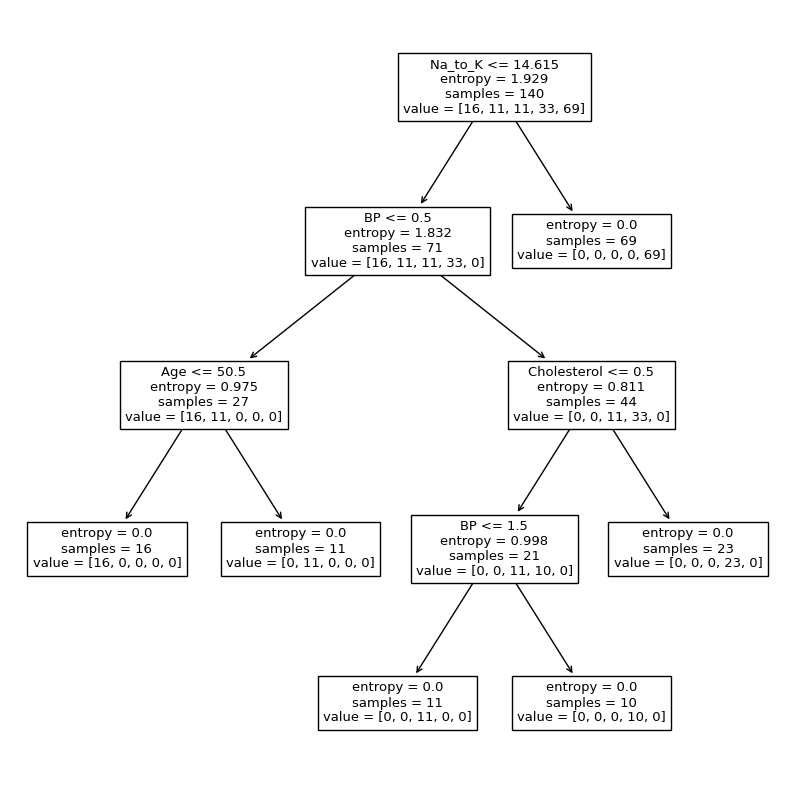

In [82]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
tree.plot_tree(modelo,feature_names=dt.columns)
plt.show()

In [63]:
print(tree.export_text(modelo))

|--- feature_4 <= 14.62
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 50.50
|   |   |   |--- class: drugA
|   |   |--- feature_0 >  50.50
|   |   |   |--- class: drugB
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_2 <= 1.50
|   |   |   |   |--- class: drugC
|   |   |   |--- feature_2 >  1.50
|   |   |   |   |--- class: drugX
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: drugX
|--- feature_4 >  14.62
|   |--- class: drugY

